In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.utils import resample 

In [3]:
data=pd.read_csv("D:\\creditcard.csv")
df=pd.DataFrame(data)

In [5]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [7]:
df.shape

(284807, 31)

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [41]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(283726, 31)

In [17]:
print(df['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


In [19]:
scaler=StandardScaler()
df['Amount']=scaler.fit_transform(df[['Amount']])
df['Time']=scaler.fit_transform(df[['Time']])


In [21]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [23]:
data_2=resample(fraud,replace=True,n_samples=len(legit),random_state=42)
bal_data=pd.concat([legit,data_2])
print(bal_data.shape)


(566506, 31)


In [25]:
print(bal_data['Class'].value_counts())

Class
0    283253
1    283253
Name: count, dtype: int64


In [27]:
print(bal_data)

            Time        V1        V2        V3        V4        V5        V6  \
0      -1.996823 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -1.996823  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2      -1.996802 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3      -1.996802 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4      -1.996781 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
221018  1.002147 -3.367770  0.099249 -6.148487  3.401955  0.458307 -1.571630   
119781 -0.405006 -2.866364  2.346949 -4.053307  3.983359 -3.463186 -1.280953   
42528  -1.130413 -4.595617  5.083690 -7.581015  7.546033 -6.949165 -1.729185   
6529   -1.830630 -1.585505  3.261585 -4.137422  2.357096 -1.405043 -1.879437   
8335   -1.762392 -1.426623  4.141986 -9.804103  6.666273 -4.749527 -2.073129   

               V7        V8        V9  

In [29]:
sample_data=bal_data.sample(frac=1,random_state=42).reset_index(drop=True)
sample_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.580614,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.349333,1
1,-1.350417,1.037209,-1.728043,-0.054283,-1.182347,-1.504138,-0.580432,-0.571171,-0.203673,-1.919427,...,0.016281,-0.067326,-0.205375,0.079323,0.347654,-0.109434,-0.010816,0.052257,0.636693,0
2,0.669403,0.259021,-3.773028,-3.795400,0.312441,-0.656807,-0.958512,1.836611,-0.798444,-1.082431,...,0.495415,-0.402454,-0.986487,0.667441,0.121997,0.888916,-0.333088,0.092343,3.859789,0
3,0.933130,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,-0.320180,1
4,1.383900,2.061713,-0.012144,-1.050097,0.413563,-0.101259,-1.206437,0.221051,-0.365707,0.460770,...,-0.282485,-0.654205,0.334803,0.060809,-0.281736,0.193590,-0.067297,-0.058678,-0.345419,0
5,0.979528,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,0.428066,1
6,-0.014113,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,...,-0.907906,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,-0.171697,1
7,1.182325,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,-0.316226,1
8,1.611360,-0.507730,0.854755,0.645291,1.653160,2.819445,4.960547,-0.162094,1.310992,-1.319074,...,0.321551,0.813516,-0.163916,0.686316,-0.259477,0.063921,0.175566,0.169116,-0.262871,0
9,-0.018767,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,-4.250657,...,0.167703,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,0.034055,1


In [31]:
print(sample_data['Class'].value_counts())

Class
1    283253
0    283253
Name: count, dtype: int64


In [33]:
x=sample_data.drop('Class',axis=1)
y=sample_data['Class']
print(y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

0         1
1         0
2         0
3         1
4         0
         ..
566501    0
566502    0
566503    1
566504    0
566505    0
Name: Class, Length: 566506, dtype: int64


In [35]:
model=Sequential([Dense(32,activation='relu'),
                  Dropout(0.5),
                  Dense(16,activation='relu'),
                  Dropout(0.5),
                  Dense(1,activation='sigmoid')])
pred={}
optimizers=['sgd','adam','rmsprop']
for i in optimizers:
   model.compile(loss='binary_crossentropy',optimizer=i,metrics=['accuracy'])
   train=model.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.2, verbose=1)
   y_pred=model.predict(X_test)
   y_pred = (y_pred> 0.5).astype("int32")
   print(i)
   print(classification_report(y_test,y_pred))
   pred[i]=y_pred

Epoch 1/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.8671 - loss: 0.3090 - val_accuracy: 0.9431 - val_loss: 0.1346
Epoch 2/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9370 - loss: 0.1677 - val_accuracy: 0.9446 - val_loss: 0.1199
Epoch 3/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9395 - loss: 0.1525 - val_accuracy: 0.9495 - val_loss: 0.1074
Epoch 4/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9432 - loss: 0.1418 - val_accuracy: 0.9559 - val_loss: 0.0956
Epoch 5/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9483 - loss: 0.1264 - val_accuracy: 0.9595 - val_loss: 0.0853
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
sgd
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56326
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.

In [37]:
model=Sequential([Dense(32,activation='tanh'),
                  Dropout(0.5),
                  Dense(16,activation='tanh'),
                  Dropout(0.5),
                  Dense(1,activation='sigmoid')])
pred_tanh={}
optimizers=['sgd','adam','rmsprop']
for i in optimizers:
   model.compile(loss='binary_crossentropy',optimizer=i,metrics=['accuracy'])
   train=model.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.2, verbose=1)
   y_pred=model.predict(X_test)
   y_pred = (y_pred> 0.5).astype("int32")
   print(i)
   print(classification_report(y_test,y_pred))
   pred_tanh[i]=y_pred

Epoch 1/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8701 - loss: 0.3051 - val_accuracy: 0.9454 - val_loss: 0.1350
Epoch 2/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9402 - loss: 0.1706 - val_accuracy: 0.9474 - val_loss: 0.1250
Epoch 3/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9431 - loss: 0.1585 - val_accuracy: 0.9520 - val_loss: 0.1189
Epoch 4/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9462 - loss: 0.1477 - val_accuracy: 0.9530 - val_loss: 0.1134
Epoch 5/5
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9478 - loss: 0.1432 - val_accuracy: 0.9552 - val_loss: 0.1085
3541/3541 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
sgd
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56326
           1       0.98      0.93      0.96     56976

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.

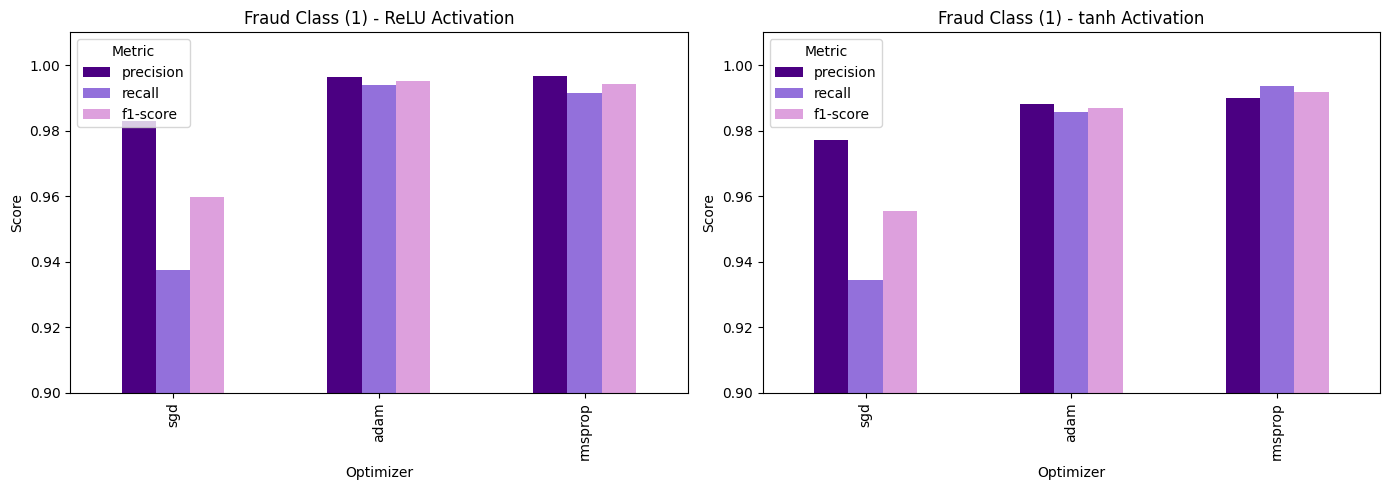

In [39]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

metrics_relu={}
for opt in pred:
    report = classification_report(y_test, pred[opt], output_dict=True)
    metrics_relu[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

metrics_tanh={}
for opt in pred_tanh:
    report = classification_report(y_test, pred_tanh[opt], output_dict=True)
    metrics_tanh[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

df_relu = pd.DataFrame(metrics_relu).T
df_tanh = pd.DataFrame(metrics_tanh).T

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['indigo', 'mediumpurple', 'plum']

df_relu.plot(kind='bar', ax=axes[0],color=colors)
axes[0].set_title("Fraud Class (1) - ReLU Activation")
axes[0].set_xlabel("Optimizer")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0.90, 1.01)
axes[0].legend(title="Metric")


df_tanh.plot(kind='bar', ax=axes[1],color=colors)
axes[1].set_title("Fraud Class (1) - tanh Activation")
axes[1].set_xlabel("Optimizer")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0.90, 1.01)
axes[1].legend(title="Metric")

plt.tight_layout()
plt.show()


In [43]:
model.save('model.h5')


In [1]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
